## Moke Basic Control

In [1]:
from moke import RUN, DAQ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#only run this line one time!
daq = DAQ()

C:\Users\moke\Documents\ekpmeasure\moke\main.py:21: UserWarning: ensure instacal is running
  warn('ensure instacal is running')


SRS560 lownoise preamp settings: DC coupling highpass 6, .3

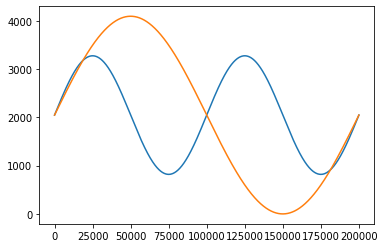

In [3]:
#definewaveforms:

#2047 is 0, max amp is +-2047
out_count = 200000

maxvoltage_real = 30

eng_amp = maxvoltage_real/5 #voltage in engineering units. max is 10V

int_amp = int(2047*eng_amp/10)

#sine
wfa = [int_amp * (np.sin(2*6.2832 * i / (out_count))) + 2047 for i in range(out_count)]
wfb = [2047 * (np.sin(6.2832 * 1 * i / (out_count))) + 2047 for i in range(out_count)]

for wf in [wfa, wfb]:
    plt.plot(wf)

In [5]:
r1 = RUN(daq)

In [6]:
r1.config(out_channel_start=0, out_channel_end=1, in_channel_start=0, in_channel_end=1,nave=1)

In [7]:
wvfrm_vstack = np.vstack((wfa, wfa))
r1.load_waveform(wvfrm_vstack)

In [ ]:
r1.go()
r1.get_df()
r1.data.plot(x = 'AOUT_0', y = 'AIN_0')

In [12]:
r1.save('..path', 'name')

file already exists. Overwrite? (y/n) n


Ok. Skipping.
